# SCENARIO:

### You work at a local jewelry store. You’ve recently been promoted and the store owner asked you to better understand your customers. Using some sneaky magic (and the help of Environics!), you’ve managed to collect some useful features for a subset of your customers: age, income, spending score (i.e., a score based on how much they’ve spent at your store thus far), and savings (i.e., how much savings they have in their bank account). Use these features to segment your customers and create customer personas.

In [1]:
import datetime
print(datetime.datetime.now())

2020-11-13 19:19:01.298559


In [2]:
import pandas as pd
import numpy as np
import sklearn

print('scikit-learn: {}'.format(sklearn.__version__))
print('pandas: {}'.format(pd.__version__))
print('numpy: {}'.format(np.__version__))

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

scikit-learn: 0.23.1
pandas: 1.0.5
numpy: 1.18.5


In [3]:
import os
os.getcwd()

'C:\\Users\\felip\\Pasta pessoal\\SMITH MMAI\\MMAI 869 - Machine Learning and AI Technology\\Assignment1_869\\Q1'

In [4]:
# TODO: Import other packages as necessary
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy import stats


## a. Load, clean, and preprocess the data.

In [5]:
# Read in the data
df = pd.read_csv("jewelry_customers.csv") # or whatever file you need

In [6]:
df.head(8)

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130
5,29,131578,0.847034,3535.514352
6,54,76500,0.785198,6878.884249
7,87,42592,0.355290,18086.287158


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


In [8]:
df.describe()

,Age,Income,SpendingScore,Savings
count,505.000000,505.000000,505.000000,505.000000
mean,59.019802,75513.291089,0.505083,11862.455867
std,24.140043,35992.922184,0.259634,4949.229253
min,17.000000,12000.000000,0.000000,0.000000
25%,34.000000,34529.000000,0.304792,6828.709702
50%,59.000000,75078.000000,0.368215,14209.932802
75%,85.000000,107100.000000,0.768279,16047.268331
max,97.000000,142000.000000,1.000000,20000.000000


In [9]:
# Check missing values
df.isnull().sum()

Age              0
Income           0
SpendingScore    0
Savings          0
dtype: int64

### Let's make a bar plot to check the distribution of number of customers in each age group:

<Figure size 1080x432 with 0 Axes>

Text(0.5, 1.0, 'Number of Customer and Ages')

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Number of Customer')

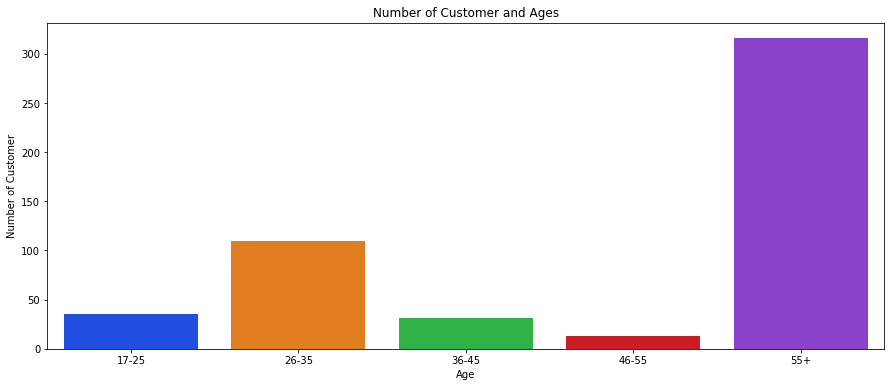

In [10]:
age17_25 = df.Age[(df.Age >= 17) & (df.Age <= 25)]
age26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age46_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
age55above = df.Age[df.Age >= 56]

x = ["17-25","26-35","36-45","46-55","55+"]
y = [len(age17_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="bright")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

### Let's continue with making a bar plot to visualize the number of customers according to their spending scores.

<Figure size 1080x432 with 0 Axes>

Text(0.5, 1.0, 'Spending Scores')

Text(0.5, 0, 'Score')

Text(0, 0.5, 'Number of Customer Having the Score')

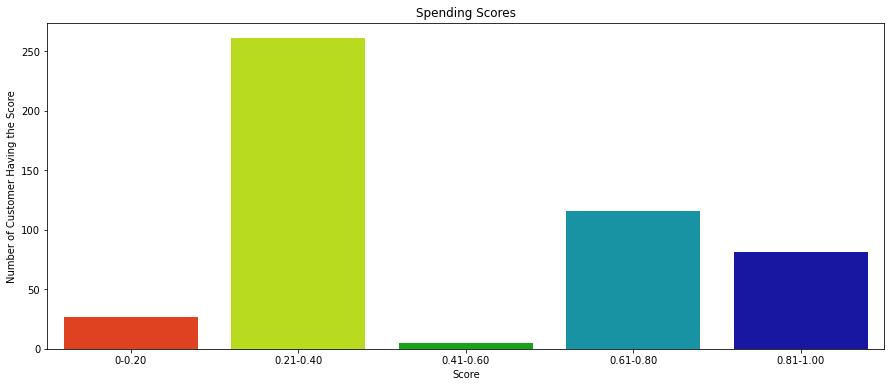

In [11]:
ss0_20 = df["SpendingScore"][(df["SpendingScore"] >= 0) & (df["SpendingScore"] <= 0.20)]
ss21_40 = df["SpendingScore"][(df["SpendingScore"] >= 0.21) & (df["SpendingScore"] <= 0.40)]
ss41_60 = df["SpendingScore"][(df["SpendingScore"] >= 0.41) & (df["SpendingScore"] <= 0.60)]
ss61_80 = df["SpendingScore"][(df["SpendingScore"] >= 0.61) & (df["SpendingScore"] <= 0.80)]
ss81_100 = df["SpendingScore"][(df["SpendingScore"] >= 0.81) & (df["SpendingScore"] <= 1.0)]

ssx = ["0-0.20", "0.21-0.40", "0.41-0.60", "0.61-0.80", "0.81-1.00"]
ssy = [len(ss0_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

### Now let's make a bar plot to visualize the number of customers according to their annual income.

<Figure size 1080x432 with 0 Axes>

Text(0.5, 1.0, 'Annual Incomes')

Text(0.5, 0, 'Income')

Text(0, 0.5, 'Number of Customers')

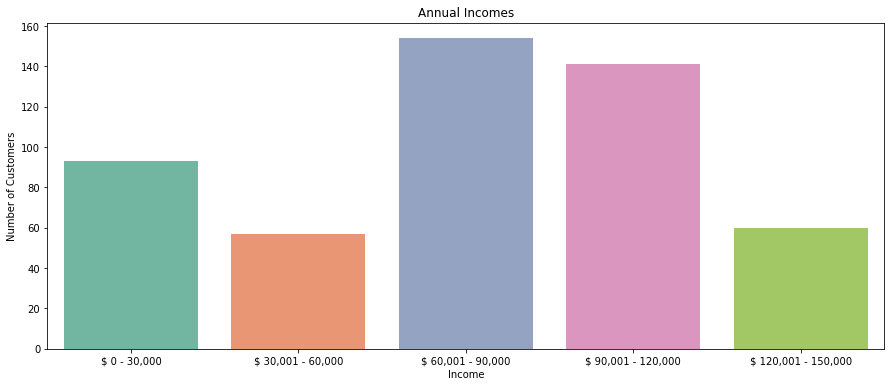

In [12]:
ai0_30 = df["Income"][(df["Income"] >= 0) & (df["Income"] <= 30000)]
ai31_60 = df["Income"][(df["Income"] > 30000) & (df["Income"] <= 60000)]
ai61_90 = df["Income"][(df["Income"] > 60000) & (df["Income"] <= 90000)]
ai91_120 = df["Income"][(df["Income"] > 90000) & (df["Income"] <= 120000)]
ai121_150 = df["Income"][(df["Income"] > 120000) & (df["Income"] <= 150000)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Set2")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customers")
plt.show()

### Now let's make a bar plot to visualize the number of customers according to their savings.

<Figure size 1080x432 with 0 Axes>

Text(0.5, 1.0, 'Savings')

Text(0.5, 0, 'Savings')

Text(0, 0.5, 'Number of Customers')

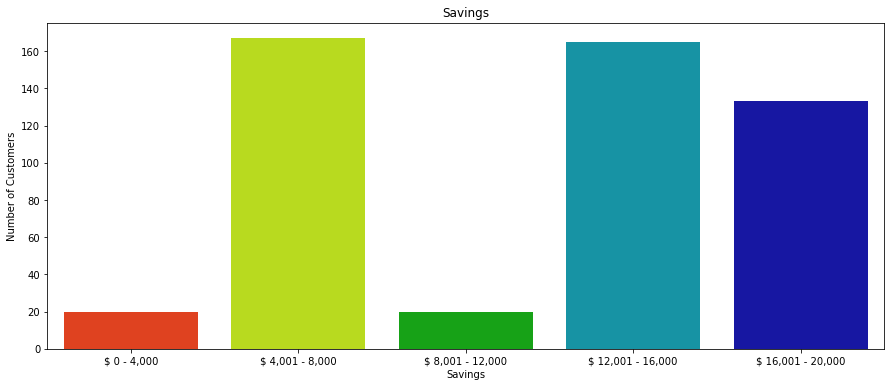

In [13]:
S0_4 = df["Savings"][(df["Savings"] >= 0) & (df["Savings"] <= 4000)]
S4_8 = df["Savings"][(df["Savings"] > 4000) & (df["Savings"] <= 8000)]
S8_12 = df["Savings"][(df["Savings"] > 8000) & (df["Savings"] <= 12000)]
S12_16 = df["Savings"][(df["Savings"] > 12000) & (df["Savings"] <= 16000)]
S16_20 = df["Savings"][(df["Savings"] > 16000) & (df["Savings"] <= 20000)]

Sx = ["$ 0 - 4,000", "$ 4,001 - 8,000", "$ 8,001 - 12,000", "$ 12,001 - 16,000", "$ 16,001 - 20,000"]
Sy = [len(S0_4.values), len(S4_8.values), len(S8_12.values), len(S12_16.values), len(S16_20.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=Sx, y=Sy, palette="nipy_spectral_r")
plt.title("Savings")
plt.xlabel("Savings")
plt.ylabel("Number of Customers")
plt.show()

### Now let's make a boxplot of all features to compare the scales.

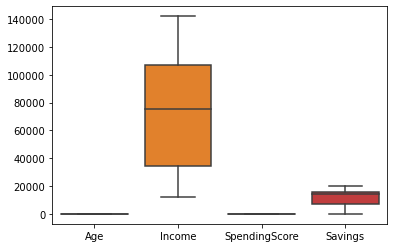

In [14]:
# Let's see the scales of the features
sns.boxplot(data=df)

#### The figure above shows us that this data needs to be normalized.

## Normalize the Data

In [15]:
scaler = StandardScaler()

In [16]:
df_Nor = df.copy()

In [17]:
df.columns

Index(['Age', 'Income', 'SpendingScore', 'Savings'], dtype='object')

In [18]:
features = ['Age', 'Income', 'SpendingScore', 'Savings']
df_Nor[features] = scaler.fit_transform(df_Nor[features])

In [19]:
df_Nor.shape

(505, 4)

In [20]:
df_Nor.describe()

,Age,Income,SpendingScore,Savings
count,5.050000e+02,5.050000e+02,5.050000e+02,5.050000e+02
mean,5.672031e-17,-2.638154e-17,-1.954432e-16,-4.058360e-16
std,1.000992e+00,1.000992e+00,1.000992e+00,1.000992e+00
min,-1.742394e+00,-1.766355e+00,-1.947295e+00,-2.399206e+00
25%,-1.037472e+00,-1.139805e+00,-7.722011e-01,-1.018085e+00
50%,-8.211094e-04,-1.210579e-02,-5.276784e-01,4.747819e-01
75%,1.077295e+00,8.784513e-01,1.014725e+00,8.463867e-01
max,1.574888e+00,1.849048e+00,1.908103e+00,1.645835e+00


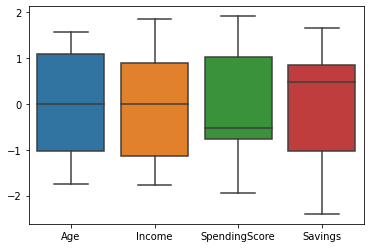

In [21]:
sns.boxplot(data=df_Nor)

#### As we can see, the data that describes the behavior of the customers are now on the same scale. 

In [22]:
df_Nor.head(8)

,Age,Income,SpendingScore,Savings
0,-0.042287,0.062733,1.103593,-1.072467
1,-0.000821,0.174811,1.102641,-1.303473
2,0.123577,-0.021200,0.761727,-0.526556
3,-0.000821,-0.031712,1.004705,-0.913395
4,1.160228,-1.606165,-0.602619,1.012686
5,-1.244802,1.559204,1.318359,-1.684141
6,-0.208151,0.027441,1.079955,-1.007937
7,1.160228,-0.915567,-0.577512,1.258782


In [23]:
df_Nor.iloc[:, 0]

0     -0.042287
1     -0.000821
2      0.123577
3     -0.000821
4      1.160228
         ...   
500   -1.286268
501    1.409024
502    1.284626
503    1.326092
504    1.243160
Name: Age, Length: 505, dtype: float64

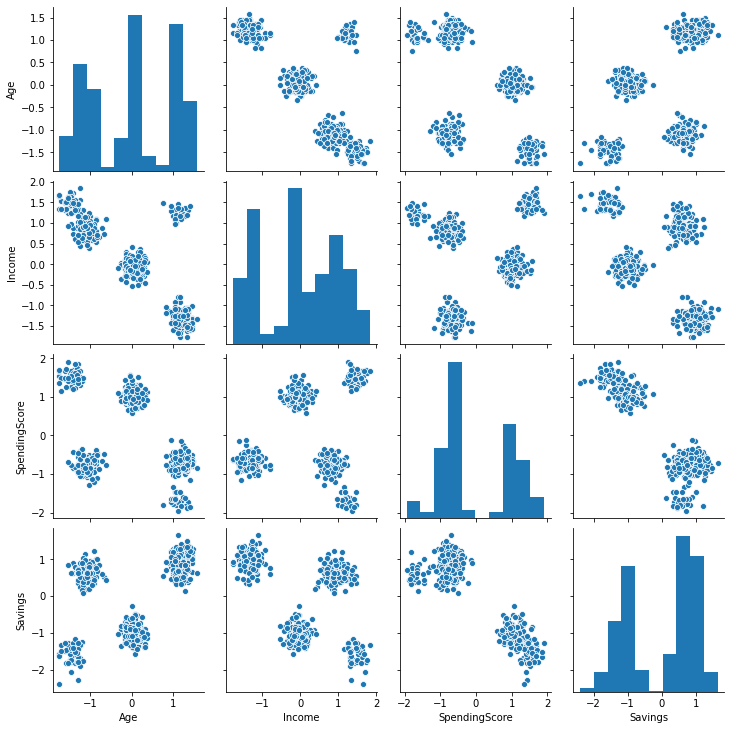

In [24]:
# Let's make a pairplot 
sns.pairplot(df_Nor)

## Plot the Raw Data

#### Let's see how the spending score of the customers is correlated to their annual income

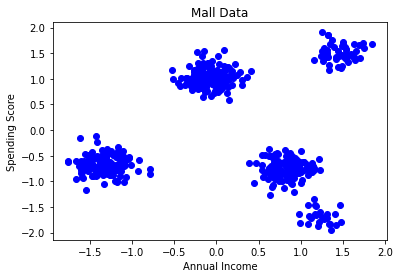

In [25]:
plt.figure();

plt.scatter(df_Nor.iloc[:, 1], df_Nor.iloc[:, 2], c="blue");
plt.title("Mall Data");
plt.xlabel('Annual Income');
plt.ylabel('Spending Score');
plt.xticks();
plt.yticks();

## b. Cluster the data using any clustering algorithm discussed in class. Measure goodness-of-fit. Try different values of hyper parameters to see how they affect goodness-of-fit.

We will use K-Means as clustering algorithm to solve this problem.

In [26]:
# We will begin with K=5 clusters
k_means = KMeans(n_clusters=5, random_state=42)
k_means.fit(df_Nor)

KMeans(n_clusters=5, random_state=42)

In [27]:
k_means.labels_

array([2, 2, 2, 2, 0, 3, 2, 0, 0, 0, 4, 1, 1, 1, 2, 4, 2, 0, 0, 4, 1, 4,
       2, 0, 4, 3, 3, 2, 0, 2, 2, 2, 0, 2, 1, 2, 0, 2, 1, 1, 2, 0, 3, 2,
       2, 3, 4, 3, 1, 2, 0, 1, 3, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 3, 3, 2, 2, 1, 0, 0, 1, 2, 1, 2, 2, 3, 2, 4, 2, 0, 0, 1, 1, 2,
       2, 2, 2, 2, 3, 0, 2, 3, 1, 2, 2, 1, 1, 3, 1, 3, 1, 0, 0, 1, 1, 2,
       0, 1, 2, 1, 1, 1, 2, 1, 3, 0, 1, 0, 0, 0, 1, 4, 2, 0, 2, 2, 1, 2,
       1, 2, 3, 0, 4, 3, 2, 1, 0, 2, 2, 3, 2, 3, 2, 4, 2, 0, 2, 1, 0, 2,
       0, 4, 1, 2, 0, 2, 1, 0, 2, 1, 0, 1, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2,
       2, 0, 0, 0, 2, 2, 1, 3, 3, 0, 1, 2, 2, 2, 1, 0, 2, 2, 2, 0, 3, 1,
       0, 0, 0, 1, 2, 1, 2, 1, 2, 0, 3, 2, 0, 0, 0, 0, 2, 0, 1, 3, 1, 0,
       2, 2, 1, 0, 1, 3, 1, 2, 2, 0, 2, 2, 0, 2, 2, 2, 1, 2, 1, 1, 3, 2,
       2, 2, 4, 2, 1, 0, 3, 3, 3, 0, 2, 1, 0, 0, 1, 1, 2, 2, 4, 2, 2, 0,
       2, 0, 1, 3, 2, 1, 0, 2, 0, 0, 1, 2, 0, 0, 2, 2, 0, 1, 1, 4, 1, 0,
       0, 1, 4, 0, 0, 3, 2, 1, 1, 2, 1, 0, 0, 1, 2,

In [28]:
# Now let's look at the centers
k_means.cluster_centers_

array([[ 1.19238486, -1.32510593, -0.67963841,  0.97016358],
       [-1.08815238,  0.82744102, -0.75240648,  0.6270464 ],
       [ 0.03879611, -0.08524639,  1.02721559, -1.00569483],
       [-1.44466803,  1.46050665,  1.51057952, -1.57249636],
       [ 1.11876151,  1.23565419, -1.68367042,  0.59588052]])

### Internal Validation Metrics

In [29]:
# Inertia == WCSS
k_means.inertia_

66.51111374859076

In [30]:
# Let's calculate the silhouette score
silhouette_score(df_Nor, k_means.labels_)

0.8048976287755765

##### Let's analyze the highest and lowest Silhouette Scores

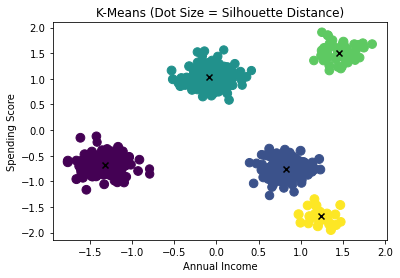

In [31]:
sample_silhouette_values = silhouette_samples(df_Nor, k_means.labels_)
sizes = 100*sample_silhouette_values

plt.figure();

plt.scatter(df_Nor.iloc[:, 1], df_Nor.iloc[:, 2], s=sizes, c=k_means.labels_)
plt.scatter(k_means.cluster_centers_[:, 1], k_means.cluster_centers_[:, 2], marker='x', c="black")

plt.title("K-Means (Dot Size = Silhouette Distance)");
plt.xlabel('Annual Income');
plt.ylabel('Spending Score');

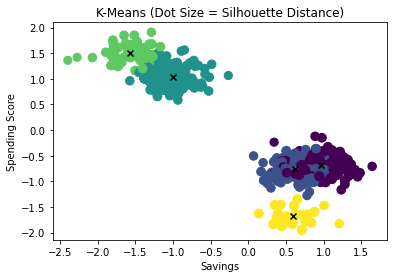

In [32]:
sample_silhouette_values = silhouette_samples(df_Nor, k_means.labels_)
sizes = 100*sample_silhouette_values

plt.figure();

plt.scatter(df_Nor.iloc[:, 3], df_Nor.iloc[:, 2], s=sizes, c=k_means.labels_)
plt.scatter(k_means.cluster_centers_[:, 3], k_means.cluster_centers_[:, 2], marker='x', c="black")

plt.title("K-Means (Dot Size = Silhouette Distance)");
plt.xlabel('Savings');
plt.ylabel('Spending Score');

In [33]:
sample_silhouette_values = silhouette_samples(df_Nor, k_means.labels_)

df_Nor_tmp = df_Nor.copy()
df_Nor_tmp['Cluster ID'] = k_means.labels_

df_Nor_tmp['Silhouette'] = sample_silhouette_values
df_Nor_tmp = df_Nor_tmp.sort_values(['Silhouette'])
df_Nor_tmp.head()
df_Nor_tmp.tail()

,Age,Income,SpendingScore,Savings,Cluster ID,Silhouette
196,-1.286268,1.327012,1.419709,-2.275742,3,0.656586
337,-1.742394,1.646975,1.360335,-2.399206,3,0.662592
290,1.160228,-0.795480,-0.757667,0.591929,0,0.673153
80,-0.000821,-0.026067,1.064913,-0.265897,2,0.674761
407,-0.622811,1.088200,-0.755187,0.445998,1,0.674795


,Age,Income,SpendingScore,Savings,Cluster ID,Silhouette
372,1.201694,-1.471505,-0.571902,0.986563,0,0.867716
464,1.118762,-1.329586,-0.677416,1.065545,0,0.868368
121,1.201694,-1.374445,-0.741044,1.060476,0,0.869548
379,1.243160,-1.397806,-0.706762,0.945914,0,0.872481
335,1.243160,-1.350862,-0.690416,0.949109,0,0.872949


#### Now let's intepret the Clusters

In [34]:
# Cluster centers
scaler.inverse_transform(k_means.cluster_centers_)

array([[8.77755102e+01, 2.78661020e+04, 3.28800461e-01, 1.66592614e+04],
       [3.27777778e+01, 1.05265810e+05, 3.09926130e-01, 1.49627781e+04],
       [5.99554140e+01, 7.24480637e+04, 7.71518368e-01, 6.88997219e+03],
       [2.41800000e+01, 1.28029120e+05, 8.96891640e-01, 4.08752031e+03],
       [8.60000000e+01, 1.19944040e+05, 6.83780993e-02, 1.48086838e+04]])

In [35]:
for label in set(k_means.labels_):
    print('\nCluster {}:'.format(label))
    print(scaler.inverse_transform(df_Nor[k_means.labels_==label].head()))


Cluster 0:
[[8.70000000e+01 1.77600000e+04 3.48777548e-01 1.68695071e+04]
 [8.70000000e+01 4.25920000e+04 3.55289682e-01 1.80862872e+04]
 [8.30000000e+01 3.43840000e+04 3.24718682e-01 1.47833791e+04]
 [8.40000000e+01 2.76930000e+04 3.67062973e-01 1.78795589e+04]
 [8.70000000e+01 3.14810000e+04 3.17423971e-01 1.61806881e+04]]

Cluster 1:
[[3.60000000e+01 9.97800000e+04 2.65432607e-01 1.63984013e+04]
 [3.00000000e+01 9.99490000e+04 3.44679224e-01 1.36216397e+04]
 [3.10000000e+01 1.07963000e+05 2.90508633e-01 1.34070814e+04]
 [3.00000000e+01 1.01073000e+05 3.14387120e-01 1.43245560e+04]
 [3.30000000e+01 1.01058000e+05 3.15081550e-01 1.49118684e+04]]

Cluster 2:
[[5.80000000e+01 7.77690000e+04 7.91328777e-01 6.55982992e+03]
 [5.90000000e+01 8.17990000e+04 7.91082047e-01 5.41766143e+03]
 [6.20000000e+01 7.47510000e+04 7.02656952e-01 9.25899297e+03]
 [5.90000000e+01 7.43730000e+04 7.65679562e-01 7.34633450e+03]
 [5.40000000e+01 7.65000000e+04 7.85197850e-01 6.87888425e+03]]

Cluster 3:
[[2.

#### Let's make a snakeplot to understand and compare segments

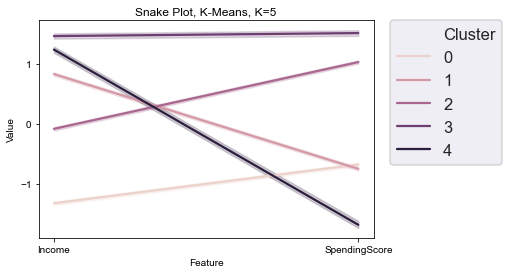

In [36]:
col_names = df.columns

X_df = pd.DataFrame(df_Nor, columns=col_names)
X_df['Cluster'] = k_means.labels_
X_df.head()

X_df_melt = pd.melt(X_df,
    id_vars=['Cluster'],
    value_vars=['Income', 'SpendingScore'],
    var_name='Feature',
    value_name='Value')

plt.title('Snake Plot, K-Means, K=5');
sns.set(style="darkgrid");
sns.set_context("talk");
sns.lineplot(x="Feature", y="Value", hue='Cluster', data=X_df_melt, legend="full");
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
#plt.savefig('out/mall_heatmap.png', bbox_inches = "tight")

## Hyperparameter Tuning
#### Now we will try different values of number of clusters to see how they affect goodness-of-fit

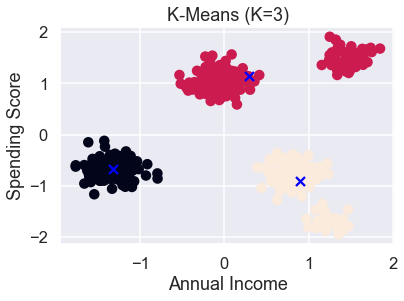

K=3, WCSS=384.81, Sil=0.70


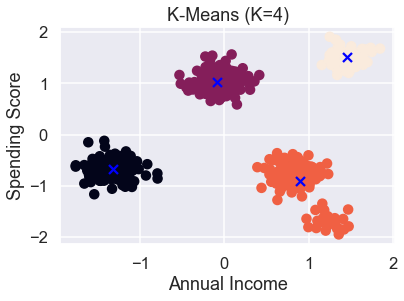

K=4, WCSS=189.70, Sil=0.76


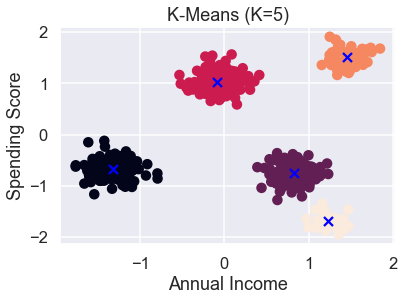

K=5, WCSS=66.51, Sil=0.80


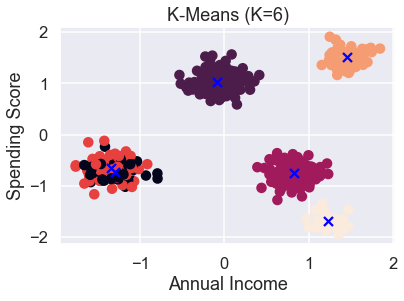

K=6, WCSS=61.14, Sil=0.63


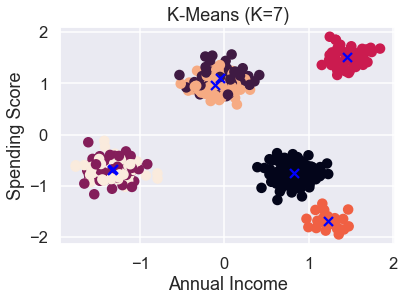

K=7, WCSS=56.89, Sil=0.45


In [37]:
def do_kmeans(df_Nor, k):
    k_means = KMeans(init='k-means++', n_clusters=k, n_init=10, random_state=42)
    k_means.fit(df_Nor)

    plt.figure();
    plt.scatter(df_Nor.iloc[:, 1], df_Nor.iloc[:, 2], c=k_means.labels_)
    plt.scatter(k_means.cluster_centers_[:, 1], k_means.cluster_centers_[:, 2], marker='x', c="blue")
    plt.title("K-Means (K={})".format(k));
    plt.xlabel('Annual Income');
    plt.ylabel('Spending Score');
    #plt.savefig('out/simple_kmeans_k{}.png'.format(k))
    plt.show()
    
    wcss = k_means.inertia_
    sil = silhouette_score(df_Nor, k_means.labels_)
    print("K={}, WCSS={:.2f}, Sil={:.2f}".format(k, wcss, sil))

for k in range(3, 8):
    do_kmeans(df_Nor, k)

### The Elbow Method
Now let's use the Elbow Method to choose the best values of the number of clusters K

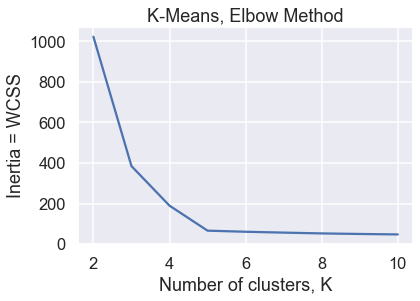

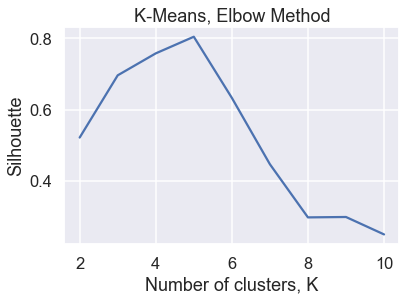

In [38]:
inertias = {}
silhouettes = {}
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df_Nor)
    inertias[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    silhouettes[k] = silhouette_score(df_Nor, kmeans.labels_, metric='euclidean')
    

plt.figure();
plt.plot(list(inertias.keys()), list(inertias.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Inertia = WCSS");


plt.figure();
plt.plot(list(silhouettes.keys()), list(silhouettes.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Silhouette");

### c. Print summary statistics for each cluster.

In [39]:
col_names = df.columns

pd.set_option("display.precision", 3)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

def stats_to_df(d, scaler):
    tmp_df = pd.DataFrame(columns=col_names)
    
    tmp_df.loc[0] = scaler.inverse_transform(d.minmax[0])
    tmp_df.loc[1] = scaler.inverse_transform(d.mean)
    tmp_df.loc[2] = scaler.inverse_transform(d.minmax[1])
    tmp_df.loc[3] = scaler.inverse_transform(d.variance)
    tmp_df.loc[4] = scaler.inverse_transform(d.skewness)
    tmp_df.loc[5] = scaler.inverse_transform(d.kurtosis)
    tmp_df.index = ['Min', 'Mean', 'Max', 'Variance', 'Skewness', 'Kurtosis'] 
    return tmp_df.T

print('All Data:')
print('Number of Instances: {}'.format(df_Nor.shape[0]))
d = stats.describe(df_Nor, axis=0)
display(stats_to_df(d, scaler))


for i, label in enumerate(set(k_means.labels_)):
    d = stats.describe(df_Nor[k_means.labels_==label], axis=0)
    print('\nCluster {}:'.format(label))
    print('Number of Instances: {}'.format(d.nobs))
    display(stats_to_df(d, scaler))

All Data:
Number of Instances: 505


,Min,Mean,Max,Variance,Skewness,Kurtosis
Age,17.000,59.020,97.000,83.184,57.562,24.786
Income,12000.000,75513.291,142000.000,111541.903,70425.760,30539.625
SpendingScore,0.000,0.505,1.000,0.765,0.569,0.136
Savings,0.000,11862.456,20000.000,16816.593,10068.589,4685.186



Cluster 0:
Number of Instances: 147


,Min,Mean,Max,Variance,Skewness,Kurtosis
Age,79.000,87.776,97.000,59.530,58.710,47.692
Income,12000.000,27866.102,46977.000,76669.861,80132.218,81449.076
SpendingScore,0.203,0.329,0.474,0.513,0.586,0.629
Savings,13470.971,16659.261,20000.000,12145.912,11114.438,11991.195



Cluster 1:
Number of Instances: 126


,Min,Mean,Max,Variance,Skewness,Kurtosis
Age,22.000,32.778,44.000,59.616,62.862,66.989
Income,89598.000,105265.810,119877.000,76541.566,76634.130,64585.246
SpendingScore,0.174,0.310,0.411,0.513,0.446,0.507
Savings,12207.526,14962.778,17968.554,12090.450,12134.487,10963.227



Cluster 2:
Number of Instances: 157


,Min,Mean,Max,Variance,Skewness,Kurtosis
Age,51.000,59.955,68.000,59.493,63.479,52.660
Income,56321.000,72448.064,90422.000,76596.267,80762.797,76774.088
SpendingScore,0.657,0.772,0.910,0.513,0.610,0.582
Savings,4077.659,6889.972,10547.775,12086.407,13179.497,14336.458



Cluster 3:
Number of Instances: 50


,Min,Mean,Max,Variance,Skewness,Kurtosis
Age,17.000,24.180,31.000,59.576,49.021,45.821
Income,117108.000,128029.120,142000.000,76413.349,86686.659,52197.548
SpendingScore,0.807,0.897,1.000,0.512,0.554,0.445
Savings,0.000,4087.520,6089.478,12192.664,6842.943,18038.914



Cluster 4:
Number of Instances: 25


,Min,Mean,Max,Variance,Skewness,Kurtosis
Age,77.000,86.000,93.000,59.576,56.766,58.461
Income,110582.000,119944.040,128596.000,76192.264,76326.079,48538.512
SpendingScore,0.000,0.068,0.156,0.511,0.623,0.360
Savings,12554.693,14808.684,17833.093,12134.296,14948.380,14021.129


## As a result of our analysis, we can see that K = 5 is the best number of clusters because it contains the inflection point on the WCSS plot and has the biggest silhouette score. Note that K = 4 is also good.

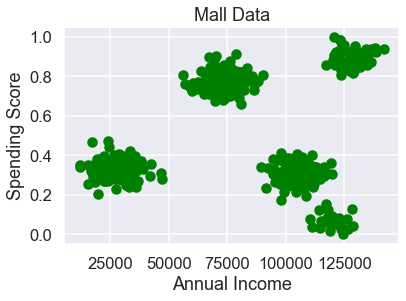

In [40]:
plt.figure();

plt.scatter(df.iloc[:, 1], df.iloc[:, 2], c="green");
plt.title("Mall Data");
plt.xlabel('Annual Income');
plt.ylabel('Spending Score');
plt.xticks();
plt.yticks();

#### Cluster 0: customers that earn less money and did not spent much money at the jewelry store.
#### Cluster 1: customers that earn a good amount of money but did not spent much money at the jewelry store.
#### Cluster 2: customers that earn around CAD 75,000 and spent a bigger amount of money at the jewelry store.
#### Cluster 3: customers that earn around CAD 128,000 and spent the biggest amount of money at the jewelry store compared to the other clusters. They seem to be very interested in jewels.
#### Cluster 4: customers that earn around CAD 120,000 and spent the smallest amount of money at the jewelry store compared to the other clusters. They seem to be less interested in jewels.
